# Energy Use Data Analysis / Visualization

# Introduction
This project is meant to gather insights on electricity usage. This file will visualize the cleaned data.

## Data
This takes in the file outputted from the "green_button_data_cleaning.ipynb".


## Original Data Source
Data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

# Column / header info
* **DATE**: Day recorded
* **START_TIME**: start of recording in Hour:Minutes
* **END_TIME**: end of recording in Hour:Minutes
* **USAGE**: Electric usage in kWh
* **COST**: amount charged for energy usage in USD

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Import the energy use spreadsheet from the 'data' directory

# Define the directory path and the regular expression pattern
import glob
directory_path = "./data"
file_pattern = "clean_*.csv"

# Use glob.glob to match filenames based on the pattern
file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_df = pd.read_csv(filepath_or_buffer=file_path)

In [25]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_TIME  17517 non-null  object 
 1   DATE        17517 non-null  object 
 2   END_TIME    17517 non-null  object 
 3   USAGE       17517 non-null  float64
 4   COST        17517 non-null  float64
 5   USAGE_DUR   17517 non-null  object 
dtypes: float64(2), object(4)
memory usage: 821.2+ KB


In [26]:
print(energy_df.columns)
energy_df.head()

Index(['START_TIME', 'DATE', 'END_TIME', 'USAGE', 'COST', 'USAGE_DUR'], dtype='object')


,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR
0,2022-10-22 00:00:00,2022-10-22 00:00:00,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00
1,2022-10-22 00:30:00,2022-10-22 00:00:00,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00
2,2022-10-22 01:00:00,2022-10-22 00:00:00,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00
3,2022-10-22 01:30:00,2022-10-22 00:00:00,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00
4,2022-10-22 02:00:00,2022-10-22 00:00:00,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00


In [27]:
# convert strings stored in csv to their proper datetime objs
energy_df['START_TIME'] = pd.to_datetime(energy_df['START_TIME'], infer_datetime_format=True)
energy_df['END_TIME'] = pd.to_datetime(energy_df['END_TIME'], infer_datetime_format=True)
energy_df['DATE'] =  pd.to_datetime(energy_df['DATE'], format='%Y-%m-%d')
energy_df.head()

,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00


In [28]:
# get the date range for the data
start_date = energy_df['DATE'].min()
end_date = energy_df['DATE'].max()
print(start_date, ' to ', end_date)

2022-10-22 00:00:00  to  2023-10-21 00:00:00


# Graph Ideas
* Time Series Plot
* bucket usage by week
* bucket usage by hour
* buckec the previous graphs by season

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


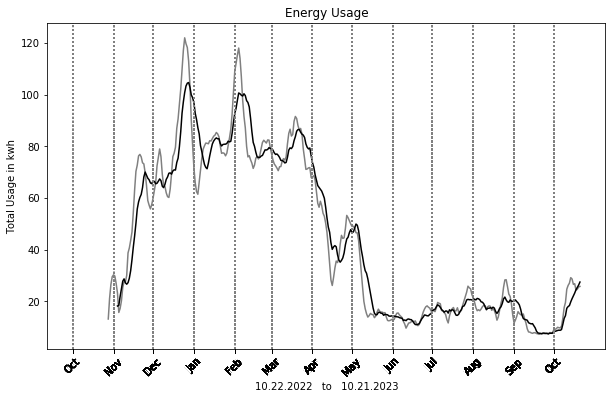

In [29]:
# Group by 'DATE' and sum 'USAGE' for each date
grouped = energy_df.groupby('DATE')['USAGE'].sum().reset_index()

# Extract year and month to create a new column
grouped['YearMonth'] = grouped['DATE'].dt.to_period('M')

# Create a Time Series plot
plt.figure(figsize=(10, 6))
# plt.plot(grouped['DATE'], grouped['USAGE'])
x_axis = start_date.strftime("%m.%d.%Y") + '   to   ' + end_date.strftime("%m.%d.%Y")
plt.xlabel(x_axis)
plt.ylabel('Total Usage in kwh')
plt.title('Energy Usage')
plt.xticks(grouped['YearMonth'].dt.to_timestamp(), grouped['YearMonth'].dt.strftime('%b'), rotation=45)


# Smoothed Line Plot (rolling average every week)
smoothed = grouped.set_index('DATE').rolling(window=7).mean()  # Adjust window for smoothing
plt.plot(smoothed.index, smoothed['USAGE'], label='weekly_avg', color='grey')


# Smoothed Line Plot (rolling average every 2 weeks)
smoothed2 = grouped.set_index('DATE').rolling(window=14).mean()  # Adjust window for smoothing
plt.plot(smoothed2.index, smoothed2['USAGE'], label='2_week_avg', color='black')


# Plotting vertical lines for each month
for date in grouped['YearMonth'].dt.to_timestamp():
    plt.axvline(x=date, color='gray', linestyle=':')

plt.show()

In [30]:
energy_df.head()

,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00


In [39]:
# create column for hourly USAGE for plotting throughout the day
energy_df['HOUR'] = energy_df['START_TIME'].dt.hour
energy_df.head()

,START_TIME,DATE,END_TIME,USAGE,COST,USAGE_DUR,Hour,HOUR
0,2022-10-22 00:00:00,2022-10-22,2022-10-22 00:29:00,0.11,0.01,0 days 00:29:00,0,0
1,2022-10-22 00:30:00,2022-10-22,2022-10-22 00:59:00,0.13,0.02,0 days 00:29:00,0,0
2,2022-10-22 01:00:00,2022-10-22,2022-10-22 01:29:00,0.09,0.01,0 days 00:29:00,0,1
3,2022-10-22 01:30:00,2022-10-22,2022-10-22 01:59:00,0.20,0.02,0 days 00:29:00,0,1
4,2022-10-22 02:00:00,2022-10-22,2022-10-22 02:29:00,0.10,0.01,0 days 00:29:00,0,2


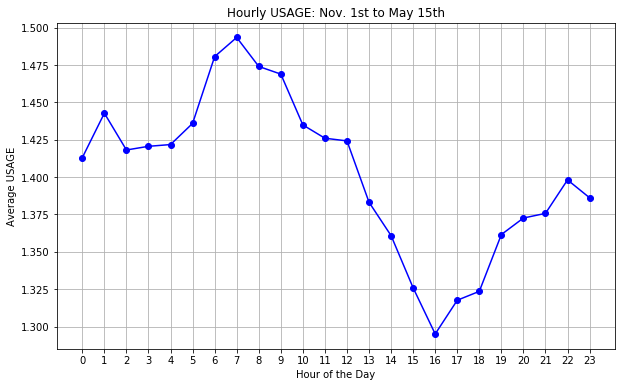

In [50]:
# Plot for the cold days
# Filter data for the first date range (from Nov. 1st to May 15th)
cold_days = energy_df[(energy_df['DATE'].dt.month >= 11) | (energy_df['DATE'].dt.month < 5) |
                      ((energy_df['DATE'].dt.month == 5) & (energy_df['DATE'].dt.day <= 15))]

# Group by hour and calculate the mean of 'USAGE'
cold_hour_avgs = cold_days.groupby('HOUR')['USAGE'].mean()

# Create a line plot to show the average USAGE for each hour of the day
plt.figure(figsize=(10, 6))
cold_hour_avgs.plot(kind='line', marker='o', color='b')

plt.title('Hourly USAGE: May 15th to Oct. 1st')
plt.xlabel('Hour of the Day')
plt.ylabel('Average USAGE')
plt.xticks(range(24))  # Set x-ticks to represent each hour (0-23)
plt.grid(True)
plt.show()

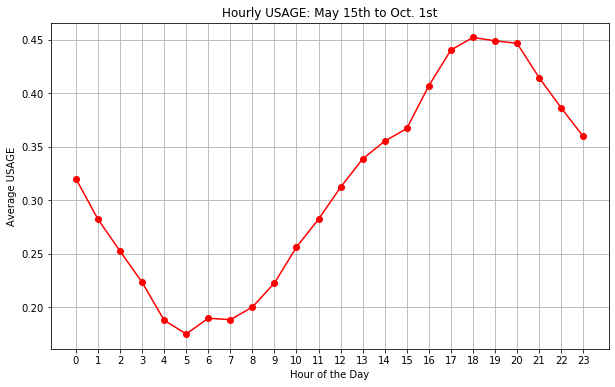

In [51]:
# Plot for the warm days
# Filter data for the second date range (from May 15th to Oct. 1st)
warm_days = energy_df[((energy_df['DATE'].dt.month == 5) & (energy_df['DATE'].dt.day > 15)) |
                       ((energy_df['DATE'].dt.month > 5) & (energy_df['DATE'].dt.month < 10)) ]

# Group by hour and calculate the mean of 'USAGE'
warm_hour_avgs = warm_days.groupby('HOUR')['USAGE'].mean()

# Create a line plot to show the average USAGE for each hour of the day
plt.figure(figsize=(10, 6))
warm_hour_avgs.plot(kind='line', marker='o', color='r')

plt.title('Hourly USAGE: May 15th to Oct. 1st')
plt.xlabel('Hour of the Day')
plt.ylabel('Average USAGE')
plt.xticks(range(24))  # Set x-ticks to represent each hour (0-23)
plt.grid(True)
plt.show()